# CAPSTONE PROJECT

## Konek Ke Database

## IMPORT PACKAGES

In [4]:
import pandas as pd
import numpy as np
import sqlite3

## Connect SQLite to Python

In [5]:
conn = sqlite3.connect("/Users/ienovo/latihan_dc/studi_kasus/CoffeeShop_Dataset.db")
cur = conn.cursor()

## Data Preparation Using SQL

In [6]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('sales_outlet',), ('pastry_inventory',), ('product',), ('generations',), ('sales_reciepts',), ('customer',)]


## PROBLEM STATEMENT

#Diasumsikan anda adalah calon dari salah satu tim data yang akan melamar pada perusahaan coffee shop. 
#Namun, perusahaan tersebut memberi data sampel penjualan kopi tersebut hanya dalam waktu tertentu. 
#Data yang anda dapatkan adalah data terkait profiling dari setiap pelanggan, transaksi berdasarkan product, dan inventory. 
#Dari user perusahaan tersebut memberikan tugas, agar anda sebagai tim data bisa menemukan keanehan, insight dari data, 
#serta bisa memberikan rekomendasi terhadap perusahaan tersebut. 

# Data Customer
- customer_id :	unique id customer
- home_store :	nama store
- customer_first-name :	nama customer
- customer_email :	email customer
- customer_since :	tanggal bergabung
- loyalty_card_number :	no loyalty card
- birthdate :	tanggal lahir
- gender :	jenis kelamin
- birth_year :	tahun lahir

# Data Generation
- birth_year :	tahun lahir
- generation :	tipe generasi

# Data Pastry Inventory
- sales_outlet_id :	unique outled id
- transaction_date : tanggal transaksi
- product_id :	unique produk id
- start_of_day :	target penjualan/stok harian per hari
- quantity_sold :	jumlah produk yang habis
- waste :	jumlah produk sisa
- % waste :	% produk sisa

# Data Produk
- product_id :	unique produk id
- product_group :	group produk - level 3
- product_category :	kategori produk - level 2
- product_type :	tipe produk - level 1
- product :	produk - level 0
- product_description :	deskripsi dari produk
- unit_of_measure :	ukuran size
- current_wholesale_price :	harga grosir
- current_retail_price :	harga jual
- tax_exempt_yn :	bebas pajak/tidak
- promo_yn :	dapat promo/tidak
- new_product_yn :	produk baru/tidak

# Data Sales Outlet
- sales_outlet_id	: unique sales id
- sales_outlet_type :	tipe outlet
- store_square_feet	: -
- store_address :	alamat store
- store_city :	kota store
- store_state_province :	provinsi store
- store_telephone :	telefon store
- store_postal_code :	postal code store
- store_longitude :	longitude store
- store_latitude :	latitude store
- manager :	kode manager
- Neighorhood :	negara tetangga

# Data Sales Receipts
- transaction_id :	unique transaksi id
- transaction_date :	tanggal transaksi
- transaction_time :	jam transaksi
- sales_outlet_id :	unique sales outlet id
- staff_id :	unique staff id
- customer_id :	unique customer id
- instore_yn :	pembelian in store/tidak
- order	: -
- line_item_id :	-
- product_id :	unique product id
- quantity :	jumlah orderan
- line_item_amount	: -
- unit_price :	harga satuan
- promo_item_yn :	dapat promo/tidak

## DATA CLEANSING

In [7]:
#akses semua table
sales_outlet = pd.read_sql_query("SELECT * FROM sales_outlet",conn)
pastry_inventory = pd.read_sql_query("SELECT * FROM pastry_inventory",conn)
product = pd.read_sql_query("SELECT * FROM product",conn)
generations = pd.read_sql_query("SELECT * FROM generations",conn)
sales_reciepts = pd.read_sql_query("SELECT * FROM sales_reciepts",conn)
customer = pd.read_sql_query("SELECT * FROM customer",conn)

In [8]:
sales_outlet.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side


In [9]:
sales_outlet.shape

(9, 12)

In [10]:
pastry_inventory.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


In [11]:
product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


In [12]:
generations.head()

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [13]:
sales_reciepts.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [14]:
customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [15]:
print(sales_outlet.duplicated().sum())
print(pastry_inventory.duplicated().sum())
print(product.duplicated().sum())
print(generations.duplicated().sum())
print(sales_reciepts.duplicated().sum())
print(customer.duplicated().sum())

0
0
0
0
0
0


In [16]:
sales_outlet.isnull().sum()

sales_outlet_id         0
sales_outlet_type       0
store_square_feet       0
store_address           0
store_city              0
store_state_province    0
store_telephone         0
store_postal_code       0
store_longitude         0
store_latitude          0
manager                 1
Neighorhood             0
dtype: int64

In [17]:
pastry_inventory.isnull().sum()

sales_outlet_id     0
transaction_date    0
product_id          0
start_of_day        0
quantity_sold       0
waste               0
% waste             0
dtype: int64

In [18]:
product.isnull().sum()

product_id                 0
product_group              0
product_category           0
product_type               0
product                    0
product_description        0
unit_of_measure            0
current_wholesale_price    0
current_retail_price       0
tax_exempt_yn              0
promo_yn                   0
new_product_yn             0
dtype: int64

In [19]:
generations.isnull().sum()

birth_year    0
generation    0
dtype: int64

In [20]:
sales_reciepts.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_yn          0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_yn       0
dtype: int64

In [21]:
customer.isnull().sum()

customer_id            0
home_store             0
customer_first-name    0
customer_email         0
customer_since         0
loyalty_card_number    0
birthdate              0
gender                 0
birth_year             0
dtype: int64

In [22]:
sales_outlet.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side


In [23]:
sales_outlet.dtypes

sales_outlet_id           int64
sales_outlet_type        object
store_square_feet         int64
store_address            object
store_city               object
store_state_province     object
store_telephone          object
store_postal_code         int64
store_longitude         float64
store_latitude          float64
manager                 float64
Neighorhood              object
dtype: object

In [24]:
pastry_inventory.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


In [25]:
pastry_inventory.dtypes

sales_outlet_id      int64
transaction_date    object
product_id           int64
start_of_day         int64
quantity_sold        int64
waste                int64
% waste             object
dtype: object

In [26]:
#mengubah tipe pada transaction_date ke date
pastry_inventory['waste']=pastry_inventory['% waste']
pastry_inventory.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,56%,56%
1,3,4/1/2019,70,18,12,33%,33%
2,3,4/1/2019,71,18,8,56%,56%
3,3,4/1/2019,72,48,9,81%,81%
4,3,4/1/2019,73,18,9,50%,50%


In [27]:
pastry_inventory['waste']=pastry_inventory['waste'].str.replace('%','') #apabila yang diganti hanya sebuah string maka masuk kelas str.replace
pastry_inventory.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,56,56%
1,3,4/1/2019,70,18,12,33,33%
2,3,4/1/2019,71,18,8,56,56%
3,3,4/1/2019,72,48,9,81,81%
4,3,4/1/2019,73,18,9,50,50%


In [28]:
#mengubah waste menjdai integer dan menghapus tanda %
pastry_inventory['waste']=pastry_inventory['waste'].astype(float)
pastry_inventory.dtypes

sales_outlet_id       int64
transaction_date     object
product_id            int64
start_of_day          int64
quantity_sold         int64
waste               float64
% waste              object
dtype: object

In [29]:
from datetime import datetime as dt

pastry_inventory['transaction_date']=pd.to_datetime(pastry_inventory['transaction_date'])
pastry_inventory.dtypes

sales_outlet_id              int64
transaction_date    datetime64[ns]
product_id                   int64
start_of_day                 int64
quantity_sold                int64
waste                      float64
% waste                     object
dtype: object

In [30]:
pastry_inventory.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,2019-04-01,69,18,8,56.0,56%
1,3,2019-04-01,70,18,12,33.0,33%
2,3,2019-04-01,71,18,8,56.0,56%
3,3,2019-04-01,72,48,9,81.0,81%
4,3,2019-04-01,73,18,9,50.0,50%


In [31]:
product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N


In [32]:
product.dtypes

product_id                   int64
product_group               object
product_category            object
product_type                object
product                     object
product_description         object
unit_of_measure             object
current_wholesale_price    float64
current_retail_price        object
tax_exempt_yn               object
promo_yn                    object
new_product_yn              object
dtype: object

In [33]:
#menghapus tanda $ dan mengganti tipe data menjadi float
product['current_retail_price']=product['current_retail_price'].str.replace('$','')
product['current_retail_price']=product['current_retail_price'].str.replace(' ','')
product.head()

<ipython-input-33-5e3f36c41c15>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  product['current_retail_price']=product['current_retail_price'].str.replace('$','')


,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N


In [34]:
product['current_retail_price']=product['current_retail_price'].astype(float)
product.dtypes

product_id                   int64
product_group               object
product_category            object
product_type                object
product                     object
product_description         object
unit_of_measure             object
current_wholesale_price    float64
current_retail_price       float64
tax_exempt_yn               object
promo_yn                    object
new_product_yn              object
dtype: object

In [35]:
product.head()

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,15.00,Y,N,N


In [36]:
generations.head()

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


In [37]:
generations.dtypes

birth_year     int64
generation    object
dtype: object

In [38]:
sales_reciepts.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [39]:
sales_reciepts.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_yn           object
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_yn        object
dtype: object

In [40]:
#mengubah tipe data transaction_date dan transaction_time menjadi tipe data datetime
sales_reciepts['transaction_date']=pd.to_datetime(sales_reciepts['transaction_date'])
sales_reciepts['transaction_time']=pd.to_datetime(sales_reciepts['transaction_time'],format='%H:%M:%S').dt.time
sales_reciepts.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [41]:
customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951


In [42]:
customer.dtypes

customer_id             int64
home_store              int64
customer_first-name    object
customer_email         object
customer_since         object
loyalty_card_number    object
birthdate              object
gender                 object
birth_year              int64
dtype: object

In [43]:
#mengubah tipe data birthdate menjadi tipe data datetime dan menambahkan kolom umur
customer['customer_since']=pd.to_datetime(customer['customer_since'])
customer['birthdate']=pd.to_datetime(customer['birthdate'])

In [44]:
todays_date = dt.today().year
customer['umur']=todays_date-customer['birth_year']
customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,umur
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,72
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,72
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,72
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,72
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,71


In [45]:
customer['umur_pelanggan']=((dt.now()-customer['customer_since']).dt.days)/365
customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,umur,umur_pelanggan
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,72,5.030137
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,72,5.021918
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,72,5.013699
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,72,5.005479
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,71,5.000000


In [46]:
customer['umur_pelanggan']=customer['umur_pelanggan'].apply(np.floor)
customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,umur,umur_pelanggan
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,72,5.0
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950,72,5.0
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950,72,5.0
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950,72,5.0
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951,71,5.0


## EXPLORATORY DATA

In [47]:
data_transaksi=pd.merge(sales_reciepts,product,on='product_id',how='left')
data_transaksi=pd.merge(data_transaksi,sales_outlet,on='sales_outlet_id',how='left')

In [48]:
data_transaksi.head()

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,...,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,...,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria


In [49]:
data_transaksi.isnull().sum()

transaction_id             0
transaction_date           0
transaction_time           0
sales_outlet_id            0
staff_id                   0
customer_id                0
instore_yn                 0
order                      0
line_item_id               0
product_id                 0
quantity                   0
line_item_amount           0
unit_price                 0
promo_item_yn              0
product_group              0
product_category           0
product_type               0
product                    0
product_description        0
unit_of_measure            0
current_wholesale_price    0
current_retail_price       0
tax_exempt_yn              0
promo_yn                   0
new_product_yn             0
sales_outlet_type          0
store_square_feet          0
store_address              0
store_city                 0
store_state_province       0
store_telephone            0
store_postal_code          0
store_longitude            0
store_latitude             0
manager       

In [50]:
data_customer=pd.merge(customer,generations,on='birth_year',how='left')
data_customer=pd.merge(data_customer,sales_reciepts,on='customer_id',how='left')
data_customer.shape

(24853, 25)

In [51]:
data_customer.isnull().sum()

customer_id            0
home_store             0
customer_first-name    0
customer_email         0
customer_since         0
loyalty_card_number    0
birthdate              0
gender                 0
birth_year             0
umur                   0
umur_pelanggan         0
generation             0
transaction_id         1
transaction_date       1
transaction_time       1
sales_outlet_id        1
staff_id               1
instore_yn             1
order                  1
line_item_id           1
product_id             1
quantity               1
line_item_amount       1
unit_price             1
promo_item_yn          1
dtype: int64

In [52]:
data_customer[data_customer['transaction_id'].isnull()]

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,umur,...,sales_outlet_id,staff_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
17078,5937,5,Medge,Julian@sollicitudin.edu,2017-11-24,743-441-9073,1970-05-14,F,1970,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data_customer.dropna(axis=0, inplace=True)
data_customer.shape

(24852, 25)

In [54]:
data_customer.isnull().sum()

customer_id            0
home_store             0
customer_first-name    0
customer_email         0
customer_since         0
loyalty_card_number    0
birthdate              0
gender                 0
birth_year             0
umur                   0
umur_pelanggan         0
generation             0
transaction_id         0
transaction_date       0
transaction_time       0
sales_outlet_id        0
staff_id               0
instore_yn             0
order                  0
line_item_id           0
product_id             0
quantity               0
line_item_amount       0
unit_price             0
promo_item_yn          0
dtype: int64

In [55]:
data_customer.head()

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,umur,...,sales_outlet_id,staff_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,72,...,3.0,12.0,Y,1.0,1.0,32.0,1.0,3.0,3.0,N
1,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,72,...,3.0,17.0,N,1.0,1.0,37.0,1.0,3.0,3.0,N
2,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,72,...,3.0,14.0,N,1.0,1.0,28.0,2.0,4.0,2.0,N
3,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,72,...,3.0,14.0,N,1.0,1.0,28.0,2.0,4.0,2.0,N
4,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950,72,...,3.0,14.0,N,1.0,1.0,58.0,1.0,3.5,3.5,N


In [56]:
data_stok=pd.merge(pastry_inventory,sales_outlet,on='sales_outlet_id',how='left')
data_stok=pd.merge(data_stok,product,on='product_id',how='left')
data_stok.dtypes

sales_outlet_id                     int64
transaction_date           datetime64[ns]
product_id                          int64
start_of_day                        int64
quantity_sold                       int64
waste                             float64
% waste                            object
sales_outlet_type                  object
store_square_feet                   int64
store_address                      object
store_city                         object
store_state_province               object
store_telephone                    object
store_postal_code                   int64
store_longitude                   float64
store_latitude                    float64
manager                           float64
Neighorhood                        object
product_group                      object
product_category                   object
product_type                       object
product                            object
product_description                object
unit_of_measure                   

In [57]:
data_stok['sisa']=data_stok['start_of_day']-data_stok['quantity_sold']
data_stok.isnull().sum()

sales_outlet_id            0
transaction_date           0
product_id                 0
start_of_day               0
quantity_sold              0
waste                      0
% waste                    0
sales_outlet_type          0
store_square_feet          0
store_address              0
store_city                 0
store_state_province       0
store_telephone            0
store_postal_code          0
store_longitude            0
store_latitude             0
manager                    0
Neighorhood                0
product_group              0
product_category           0
product_type               0
product                    0
product_description        0
unit_of_measure            0
current_wholesale_price    0
current_retail_price       0
tax_exempt_yn              0
promo_yn                   0
new_product_yn             0
sisa                       0
dtype: int64

## VISUALISASI DATA

In [58]:
import matplotlib.pyplot as plt

### ANALISA PENJUALAN

In [59]:
#grafik penjualan harian
data_harian=data_transaksi.groupby('transaction_date')['unit_price','quantity'].sum().reset_index()
data_harian=data_harian.set_axis(['transaction_date','unit_price','quantity'],axis=1)
data_harian.head()

<ipython-input-59-c5450466f93e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_harian=data_transaksi.groupby('transaction_date')['unit_price','quantity'].sum().reset_index()


,transaction_date,unit_price,quantity
0,2019-04-01,5206.40,2391
1,2019-04-02,5091.35,2354
2,2019-04-03,5276.05,2398
3,2019-04-04,4943.10,2300
4,2019-04-05,5111.80,2330


In [60]:
#grafik penjualan jam
data_harian_jam=data_transaksi.groupby('transaction_time')['unit_price','quantity'].sum().reset_index()
data_harian_jam=data_harian_jam.set_axis(['transaction_time','unit_price','quantity'],axis=1)
data_harian_jam.head()

<ipython-input-60-a1c8f97b38c3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_harian_jam=data_transaksi.groupby('transaction_time')['unit_price','quantity'].sum().reset_index()


,transaction_time,unit_price,quantity
0,01:00:44,4.50,1
1,01:02:18,3.00,1
2,01:04:03,2.55,1
3,01:05:57,3.00,1
4,01:06:05,4.00,1


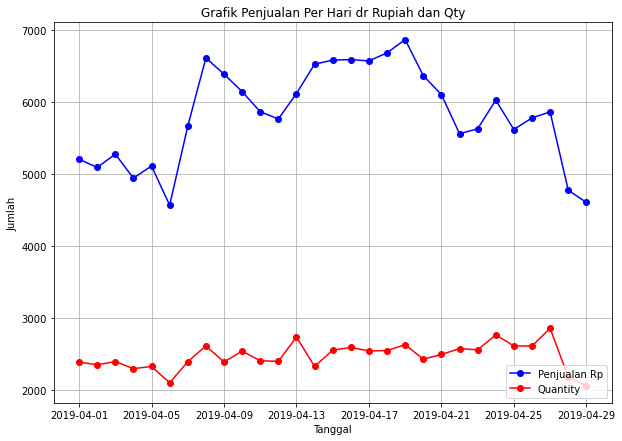

In [61]:
x= data_harian['transaction_date']
y= data_harian['unit_price']
y1= data_harian['quantity']

plt.figure(figsize=(10, 7))
plt.plot(x,y, marker='o', color='b')
plt.plot(x,y1,marker='o', color='r')

#pasang label
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
#title grafik
plt.title("Grafik Penjualan Per Hari dr Rupiah dan Qty")
#buat legend
plt.legend(labels=('Penjualan Rp','Quantity'), loc='lower right')
#tampilkan grid
plt.grid(True)
plt.show()

In [62]:
data_instore=data_transaksi.groupby(['instore_yn','transaction_date']).agg({'transaction_date':['count'],'quantity':['sum'],'unit_price':['sum']}).reset_index()
data_instore.head()

instore_yn transaction_date       quantity unit_price
                              count      sum        sum
0                  2019-04-07   294      427     884.00
1          N       2019-04-01   818     1198    2537.20
2          N       2019-04-02   824     1167    2565.60
3          N       2019-04-03   814     1173    2559.15
4          N       2019-04-04   776     1135    2402.10

In [63]:
data_instore.drop([0,0], axis=0, inplace=True)
data_instore.head()

instore_yn transaction_date       quantity unit_price
                              count      sum        sum
1          N       2019-04-01   818     1198    2537.20
2          N       2019-04-02   824     1167    2565.60
3          N       2019-04-03   814     1173    2559.15
4          N       2019-04-04   776     1135    2402.10
5          N       2019-04-05   802     1152    2508.95

In [64]:
data_instore=data_instore.set_axis(['instore_yn','transaction_date','transaction_count','quantity','unit_price'],axis=1)
data_instore_y=data_instore[(data_instore['instore_yn'])=='Y']
data_instore_n=data_instore[(data_instore['instore_yn'])=='N']

In [65]:
data_instore_grafik = pd.merge(data_instore_y,data_instore_n,on='transaction_date',how='left')
data_instore_grafik.head()

,instore_yn_x,transaction_date,transaction_count_x,quantity_x,unit_price_x,instore_yn_y,transaction_count_y,quantity_y,unit_price_y
0,Y,2019-04-01,839,1193,2669.20,N,818,1198,2537.20
1,Y,2019-04-02,814,1187,2525.75,N,824,1167,2565.60
2,Y,2019-04-03,869,1225,2716.90,N,814,1173,2559.15
3,Y,2019-04-04,815,1165,2541.00,N,776,1135,2402.10
4,Y,2019-04-05,832,1178,2602.85,N,802,1152,2508.95


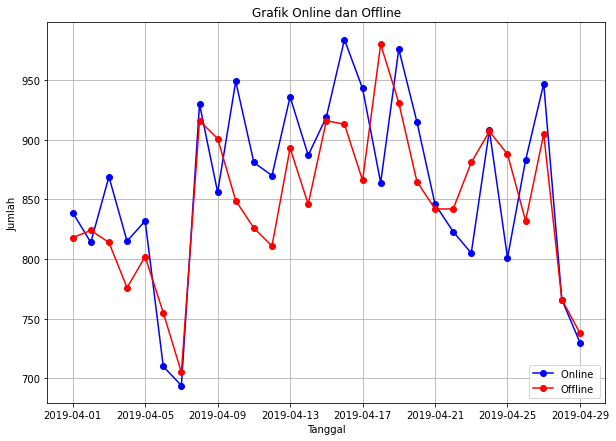

In [66]:
x=data_instore_grafik['transaction_date']
y=data_instore_grafik['transaction_count_x']
y1=data_instore_grafik['transaction_count_y']
#y1=pd.array(data_instore[(data_instore['instore_yn']=='N')]['quantity']).to_numpy
                  
plt.figure(figsize=(10, 7))
plt.plot(x,y, marker='o', color='b')
plt.plot(x,y1,marker='o', color='r')

#pasang label
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
#title grafik
plt.title("Grafik Online dan Offline")
#buat legend
plt.legend(labels=('Online ','Offline'), loc='lower right')
#tampilkan grid
plt.grid(True)
plt.show()

In [67]:
data_hasil = data_instore.groupby('instore_yn')['quantity','unit_price'].sum().reset_index()
data_hasil = data_hasil.set_axis(['instore_yn','quantity','unit_price'],axis=1)

<ipython-input-67-d7da8934ccd1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_hasil = data_instore.groupby('instore_yn')['quantity','unit_price'].sum().reset_index()


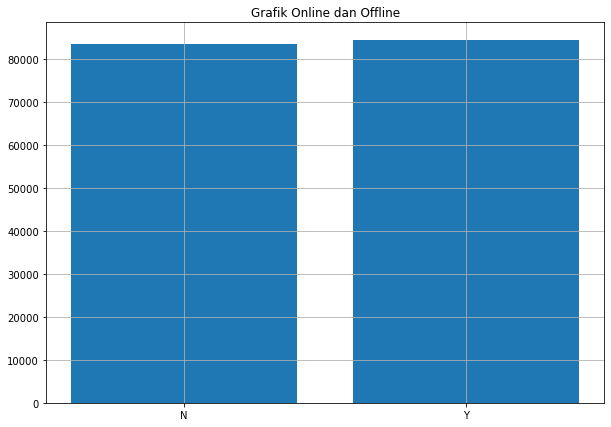

In [68]:
x=data_hasil['instore_yn']
y=data_hasil['unit_price']
                  
plt.figure(figsize=(10, 7))
plt.bar(x,y)

plt.title("Grafik Online dan Offline")
#tampilkan grid
plt.grid(True)
plt.show()

In [69]:
data_jam = data_transaksi.loc[:,['transaction_date','transaction_time','quantity','unit_price']]
#data_jam['jam']=data_jam['transaction_time'].dt.ho
data_jam.head()

,transaction_date,transaction_time,quantity,unit_price
0,2019-04-01,12:04:43,1,2.50
1,2019-04-01,15:54:39,2,3.50
2,2019-04-01,14:34:59,2,2.50
3,2019-04-01,16:06:04,2,2.50
4,2019-04-01,19:18:37,1,2.45


In [70]:
data_jam['transaction_date2']=data_jam['transaction_date']," "data_jam['transaction_time']
#data_jam['transaction_time2'] = pd.to_datetime()
#data_jam.head()
data.head()

SyntaxError: invalid syntax (<ipython-input-70-12a162ea64f6>, line 1)

### ANALISA PRODUK

In [71]:
#mengetahui type produk terlaris
data_produk=data_transaksi.groupby('product_type')['unit_price','quantity'].sum().sort_values('quantity',ascending=False).reset_index()

<ipython-input-71-df3ef8fff79a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_produk=data_transaksi.groupby('product_type')['unit_price','quantity'].sum().sort_values('quantity',ascending=False).reset_index()


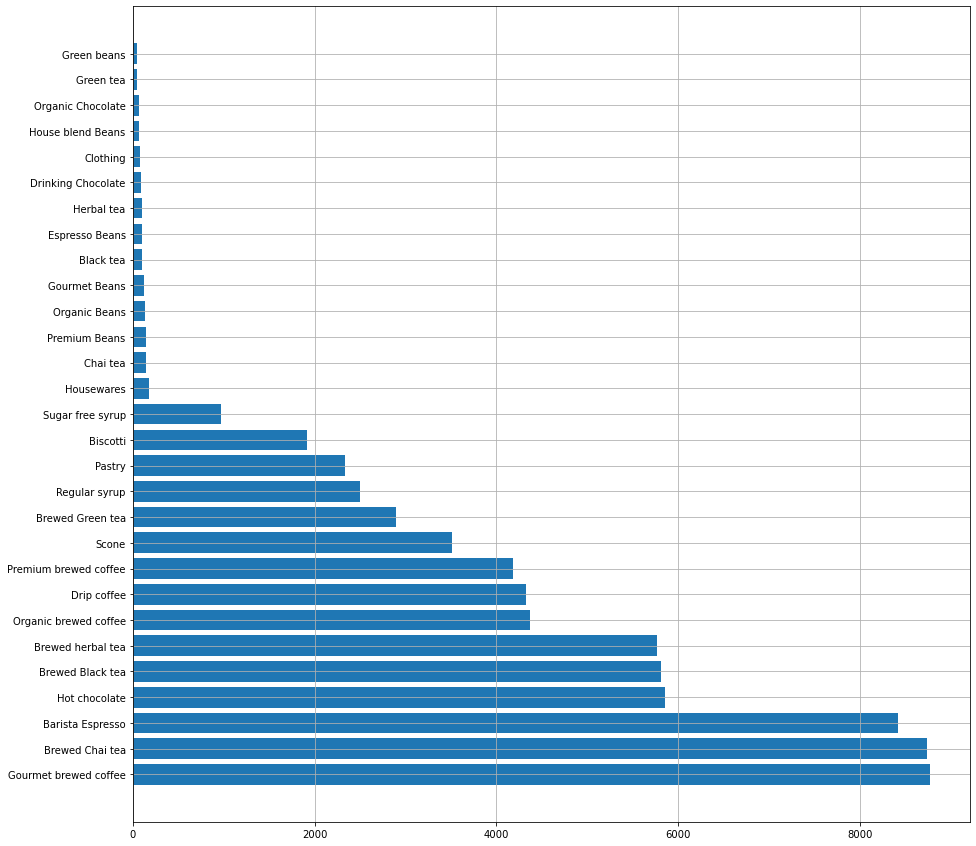

In [72]:
x = data_produk['product_type']
y= data_produk['unit_price']
y1= data_produk['quantity']

plt.figure(figsize=(15, 15))
plt.grid(True)
plt.barh(x,y1) #tambahkan h pada tulisan bar untuk tampilan horizontal
plt.show()

In [73]:
#mengetahui type produk yang selalu terjual bersamaan
data_transaksi.groupby('product_type')['unit_price'].mean()

product_type
Barista Espresso          3.652349
Biscotti                  3.418483
Black tea                 8.950000
Brewed Black tea          2.745119
Brewed Chai tea           2.942137
Brewed Green tea          2.740308
Brewed herbal tea         2.743247
Chai tea                  9.713907
Clothing                 27.873418
Drinking Chocolate       10.429070
Drip coffee               2.489302
Espresso Beans           17.429000
Gourmet Beans            18.500000
Gourmet brewed coffee     2.702954
Green beans              10.000000
Green tea                 9.250000
Herbal tea                8.950000
Hot chocolate             4.146963
House blend Beans        18.000000
Housewares               13.518072
Organic Beans            20.319853
Organic Chocolate         7.600000
Organic brewed coffee     2.893597
Pastry                    3.686366
Premium Beans            34.086864
Premium brewed coffee     3.121556
Regular syrup             0.800000
Scone                     3.529915
Sugar f

In [74]:
produk = data_transaksi.groupby('product_type')['quantity'].sum().index
quantity = data_transaksi.groupby('product_type')['quantity'].sum()
harga = data_transaksi.groupby('product_type')['unit_price'].sum()

<ipython-input-75-a60679108305>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(produk, rotation='vertical' , size=12)


[Text(0, 0, 'Barista Espresso'),
 Text(1, 0, 'Biscotti'),
 Text(2, 0, 'Black tea'),
 Text(3, 0, 'Brewed Black tea'),
 Text(4, 0, 'Brewed Chai tea'),
 Text(5, 0, 'Brewed Green tea'),
 Text(6, 0, 'Brewed herbal tea'),
 Text(7, 0, 'Chai tea'),
 Text(8, 0, 'Clothing'),
 Text(9, 0, 'Drinking Chocolate'),
 Text(10, 0, 'Drip coffee'),
 Text(11, 0, 'Espresso Beans'),
 Text(12, 0, 'Gourmet Beans'),
 Text(13, 0, 'Gourmet brewed coffee'),
 Text(14, 0, 'Green beans'),
 Text(15, 0, 'Green tea'),
 Text(16, 0, 'Herbal tea'),
 Text(17, 0, 'Hot chocolate'),
 Text(18, 0, 'House blend Beans'),
 Text(19, 0, 'Housewares'),
 Text(20, 0, 'Organic Beans'),
 Text(21, 0, 'Organic Chocolate'),
 Text(22, 0, 'Organic brewed coffee'),
 Text(23, 0, 'Pastry'),
 Text(24, 0, 'Premium Beans'),
 Text(25, 0, 'Premium brewed coffee'),
 Text(26, 0, 'Regular syrup'),
 Text(27, 0, 'Scone'),
 Text(28, 0, 'Sugar free syrup')]

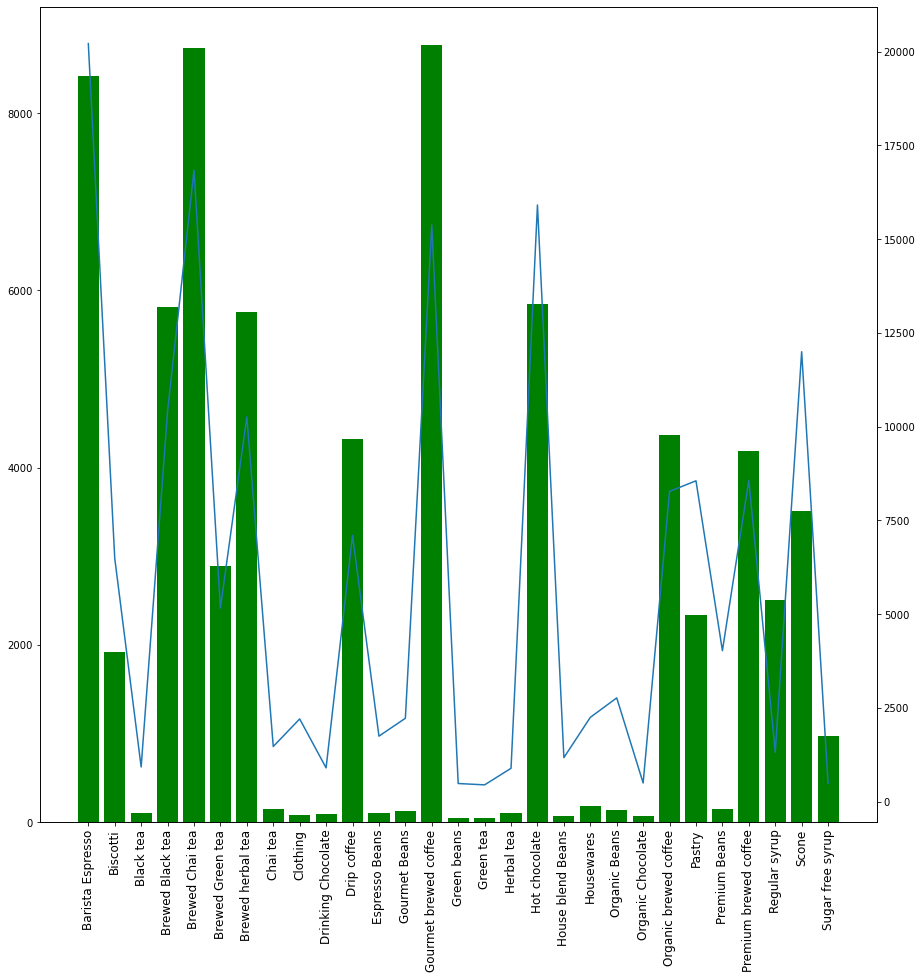

In [75]:
fig, ax1 = plt.subplots(figsize=(15, 15))
ax2=ax1.twinx()
ax1.bar(produk, quantity, color = 'g')
ax2.plot(produk, harga)
ax1.set_xticklabels(produk, rotation='vertical' , size=12)

### SEGEMEN PASAR

In [99]:
data_umur = data_customer.groupby(['umur'])['customer_id'].count().reset_index()
data_umur.head(10)

,umur,customer_id
0,21,180
1,22,658
2,23,656
3,24,728
4,25,664
5,26,718
6,27,685
7,28,587
8,29,664
9,30,710


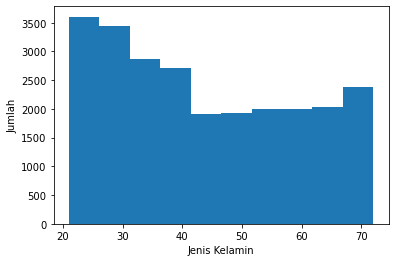

In [108]:
#mengetahui sebaran jenis kelamin pelanggan
x=data_customer['umur']
plt.hist(x)
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()

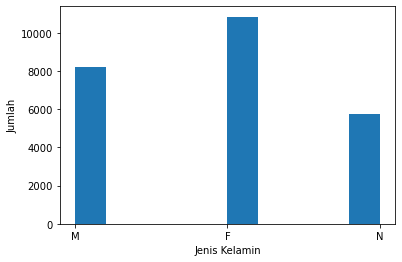

In [95]:
#mengetahui sebaran jenis kelamin pelanggan
x=data_customer['gender']
plt.hist(x)
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()

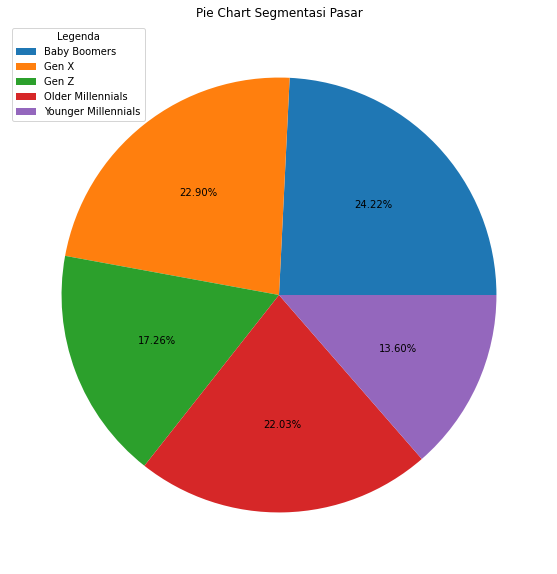

In [78]:
#mengetahui sebaran umur pelanggan
data_pie=data_customer.groupby('generation').agg({'generation':['count']}).reset_index()
data_pie=data_pie.set_axis(['generation','jumlah'], axis=1)
plt.figure(figsize=(10, 10))
plt.pie(data_pie['jumlah'], autopct="%1.2f%%")
plt.title("Pie Chart Segmentasi Pasar")
plt.legend(title="Legenda",labels=data_pie['generation'], loc='upper left')
plt.show()

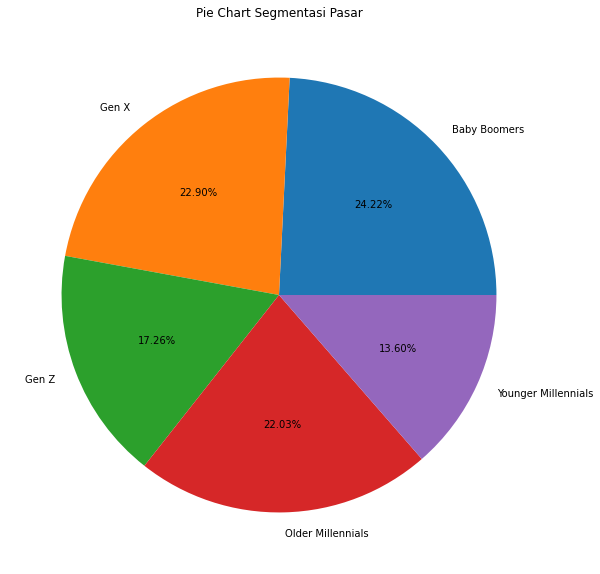

In [79]:
#mengetahui besaran pasar per generasi
data_pie=data_customer.groupby('generation').agg({'generation':['count']}).reset_index()
data_pie=data_pie.set_axis(['generation','jumlah'], axis=1)
plt.figure(figsize=(10, 10))
plt.pie(data_pie['jumlah'],labels=data_pie['generation'], autopct="%1.2f%%")
plt.title("Pie Chart Segmentasi Pasar")
plt.show()

In [80]:
data_promo = data_customer.groupby(['generation','promo_item_yn'])['transaction_date'].count().sort_values(ascending=True).reset_index()
data_promo.head(10)

,generation,promo_item_yn,transaction_date
0,Gen X,Y,32
1,Younger Millennials,Y,35
2,Gen Z,Y,37
3,Baby Boomers,Y,42
4,Older Millennials,Y,43
5,Younger Millennials,N,3344
6,Gen Z,N,4252
7,Older Millennials,N,5431
8,Gen X,N,5659
9,Baby Boomers,N,5977


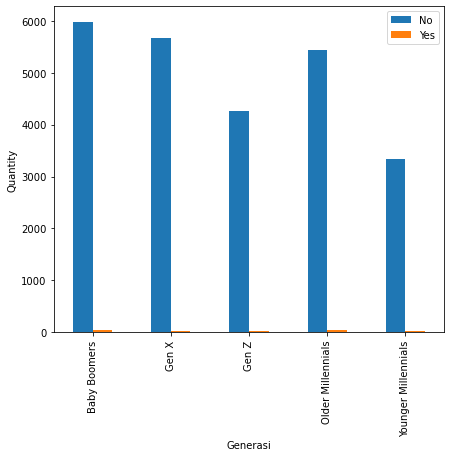

In [81]:
df_pivot = pd.pivot_table(
    data_promo, 
    values="transaction_date",
    index="generation",
    columns="promo_item_yn", 
    aggfunc=np.mean
)

ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(7, 6)

ax.legend(labels=('No','Yes'))

ax.set_xlabel("Generasi")
ax.set_ylabel("Quantity")

fig.savefig("generasi_promo.png")


In [82]:
data_customer[data_customer['instore_yn']==' ']

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,umur,...,sales_outlet_id,staff_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
17204,8005,8,Colette,Orson@magnis.us,2017-12-16,187-230-3596,1970-03-29,F,1970,52,...,8.0,43.0,,1.0,1.0,34.0,1.0,2.45,2.45,N
17211,8006,8,Zena,Stewart@lacinia.us,2019-02-15,500-768-3793,1992-06-26,F,1992,30,...,8.0,41.0,,1.0,1.0,56.0,2.0,5.10,2.55,N
17575,8030,8,Deirdre,Austin@Nullam.edu,2018-08-23,383-091-4412,1994-01-10,F,1994,28,...,8.0,13.0,,1.0,1.0,55.0,1.0,4.00,4.00,N
17673,8036,8,Wylie,Steven@Praesent.net,2018-12-06,171-771-7331,1992-01-27,N,1992,30,...,8.0,41.0,,1.0,1.0,58.0,1.0,3.50,3.50,N
18257,8072,8,Lana,Sybil@vel.us,2017-10-30,549-192-0795,1973-04-12,F,1973,49,...,8.0,13.0,,1.0,1.0,41.0,2.0,8.50,4.25,N
18258,8072,8,Lana,Sybil@vel.us,2017-10-30,549-192-0795,1973-04-12,F,1973,49,...,8.0,13.0,,1.0,2.0,65.0,2.0,1.60,0.80,N
18259,8072,8,Lana,Sybil@vel.us,2017-10-30,549-192-0795,1973-04-12,F,1973,49,...,8.0,13.0,,1.0,4.0,74.0,1.0,3.50,3.50,N
18387,8080,8,Lila,Dacey@primis.gov,2018-09-05,254-332-8882,1979-10-29,F,1979,43,...,8.0,13.0,,1.0,1.0,26.0,2.0,6.00,3.00,N
18965,8121,8,Rooney,Audrey@Aenean.gov,2018-03-25,273-860-3984,1996-12-21,M,1996,26,...,8.0,43.0,,1.0,1.0,40.0,1.0,3.75,3.75,N
18966,8121,8,Rooney,Audrey@Aenean.gov,2018-03-25,273-860-3984,1996-12-21,M,1996,26,...,8.0,43.0,,1.0,2.0,84.0,1.0,0.80,0.80,N


In [83]:
data_customer['instore_yn']=data_customer['instore_yn'].replace(' ','T')

In [84]:
data_instore = data_customer.groupby(['generation','instore_yn'])['transaction_date'].count().reset_index()
data_instore.head(10)

,generation,instore_yn,transaction_date
0,Baby Boomers,N,3002
1,Baby Boomers,T,15
2,Baby Boomers,Y,3002
3,Gen X,N,2931
4,Gen X,T,12
5,Gen X,Y,2748
6,Gen Z,N,2056
7,Gen Z,T,7
8,Gen Z,Y,2226
9,Older Millennials,N,2750


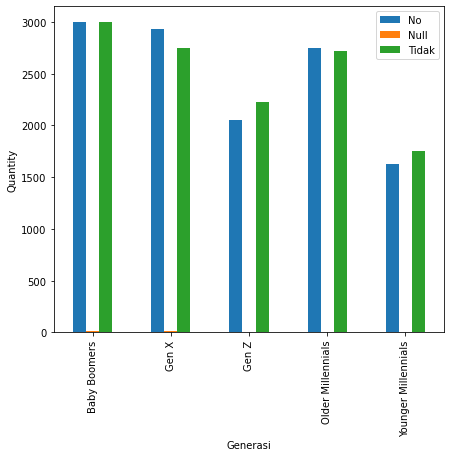

In [85]:
df_pivot = pd.pivot_table(
    data_instore, 
    values="transaction_date",
    index="generation",
    columns="instore_yn", 
    aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Generasi")
ax.set_ylabel("Quantity")

ax.legend(labels=('No','Null','Tidak'))

# Use this to show the plot in a new window
# plt.show()
# Export the plot as a PNG file
fig.savefig("generasi_instore.png")


### ANALISA STOK

In [86]:
data_stok_harian = data_stok.groupby('transaction_date')['start_of_day','quantity_sold','sisa'].sum().reset_index()
data_stok_harian = data_stok_harian.set_axis(['transaction_date','start_of_day','quantity_sold','sisa'],axis=1)
data_stok_harian.head()

<ipython-input-86-5d411aa0879d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_stok_harian = data_stok.groupby('transaction_date')['start_of_day','quantity_sold','sisa'].sum().reset_index()


,transaction_date,start_of_day,quantity_sold,sisa
0,2019-04-01,120,46,74
1,2019-04-02,120,46,74
2,2019-04-03,120,41,79
3,2019-04-04,120,48,72
4,2019-04-05,18,0,18


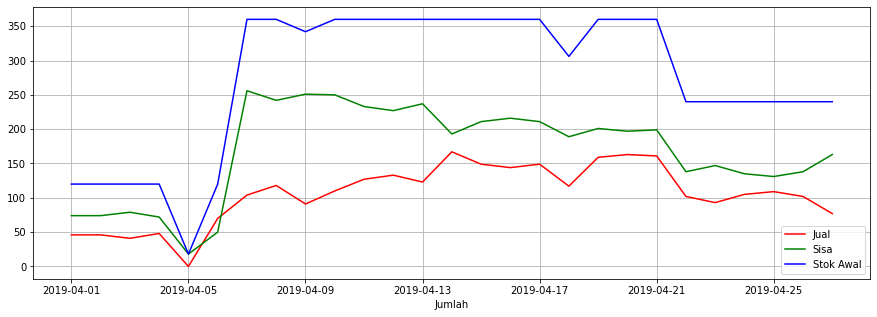

In [87]:
x = data_stok_harian['transaction_date']
y = data_stok_harian['quantity_sold']
y1 = data_stok_harian['sisa']
y2 = data_stok_harian['start_of_day']

plt.figure(figsize=(15, 5))
plt.grid(True)
plt.xlabel("Tanggal")
plt.xlabel("Jumlah")

plt.plot(x,y,color='r')
plt.plot(x,y1,color='g')
plt.plot(x,y2,color='b')
plt.legend(labels=('Jual','Sisa','Stok Awal'), loc='lower right')

plt.show()

In [88]:
data_stok_outlet= data_stok.groupby('sales_outlet_id')['start_of_day','quantity_sold','sisa'].sum().reset_index()
data_stok_outlet = data_stok_outlet.set_axis(['sales_outlet_id','start_of_day','quantity_sold','sisa'],axis=1)
data_stok_outlet.head()

<ipython-input-88-268130dbb51e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_stok_outlet= data_stok.groupby('sales_outlet_id')['start_of_day','quantity_sold','sisa'].sum().reset_index()


,sales_outlet_id,start_of_day,quantity_sold,sisa
0,3,2346,847,1499
1,5,2520,930,1590
2,8,2520,1077,1443


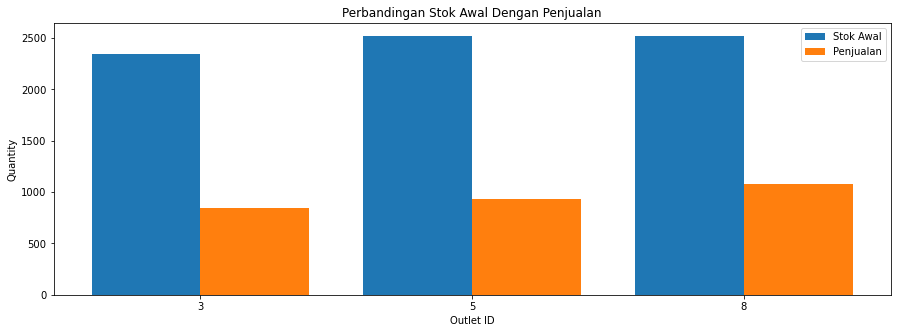

In [89]:
X = data_stok_outlet['sales_outlet_id']
X_axis = np.arange(len(X))

plt.figure(figsize=(15, 5))

plt.bar(X_axis - 0.2, data_stok_outlet['start_of_day'], 0.4, label = 'Stok Awal')
plt.bar(X_axis + 0.2, data_stok_outlet['quantity_sold'], 0.4, label = 'Penjualan')
  
plt.xticks(X_axis, X)
plt.xlabel("Outlet ID")
plt.ylabel("Quantity")
plt.title("Perbandingan Stok Awal Dengan Penjualan")
plt.legend()
plt.show()

In [90]:
data_stok_produk= data_stok.groupby('product')['start_of_day','quantity_sold','sisa'].sum().reset_index()
data_stok_produk = data_stok_produk.set_axis(['product','start_of_day','quantity_sold','sisa'],axis=1)
data_stok_produk.head()

<ipython-input-90-62c1dcc3f07d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_stok_produk= data_stok.groupby('product')['start_of_day','quantity_sold','sisa'].sum().reset_index()


,product,start_of_day,quantity_sold,sisa
0,Almond Croissant,1080,480,600
1,Chocolate Croissant,1098,519,579
2,Cranberry Scone,1098,502,596
3,Ginger Scone,2976,840,2136
4,Hazelnut Biscotti,1134,513,621


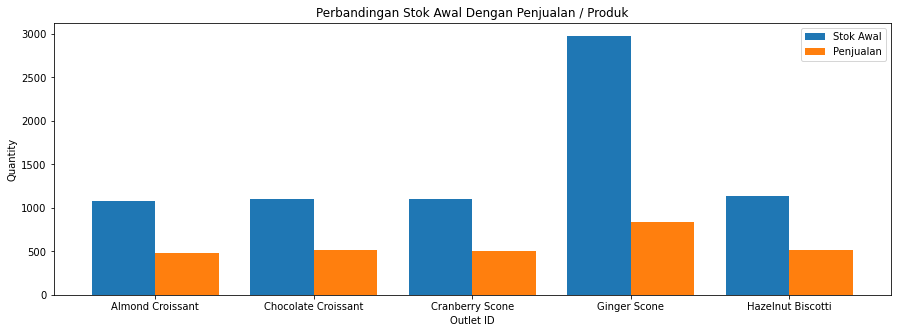

In [91]:
X = data_stok_produk['product']
X_axis = np.arange(len(X))

plt.figure(figsize=(15, 5))
  
plt.bar(X_axis - 0.2, data_stok_produk['start_of_day'], 0.4, label = 'Stok Awal')
plt.bar(X_axis + 0.2, data_stok_produk['quantity_sold'], 0.4, label = 'Penjualan')
  
plt.xticks(X_axis, X)
plt.xlabel("Outlet ID")
plt.ylabel("Quantity")
plt.title("Perbandingan Stok Awal Dengan Penjualan / Produk")
plt.legend()
plt.show()